Original shape: (484, 484)


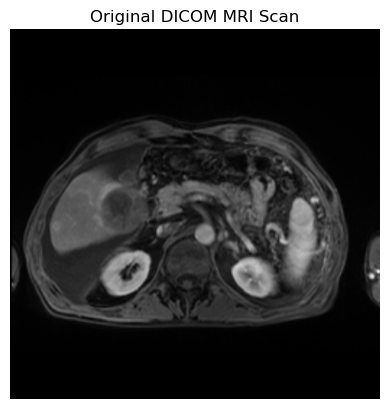

In [11]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

# Load the DICOM file
dicom_path = "D:/MRI Analysis/mri_sample.dcm"
ds = pydicom.dcmread(dicom_path)

# Extract the pixel array
image = ds.pixel_array
print("Original shape:", image.shape)

# Display the raw image
plt.imshow(image, cmap='gray')
plt.title("Original DICOM MRI Scan")
plt.axis("off")
plt.show()

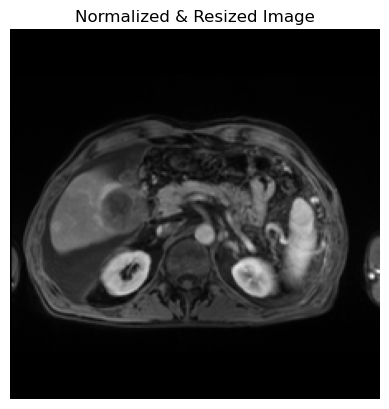

In [13]:
import cv2

# Normalize pixel values to [0, 255] and convert to uint8
image_normalized = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
image_normalized = image_normalized.astype(np.uint8)

# Resize to 224x224 (common CNN input size)
image_resized = cv2.resize(image_normalized, (224, 224))

plt.imshow(image_resized, cmap='gray')
plt.title("Normalized & Resized Image")
plt.axis("off")
plt.show()

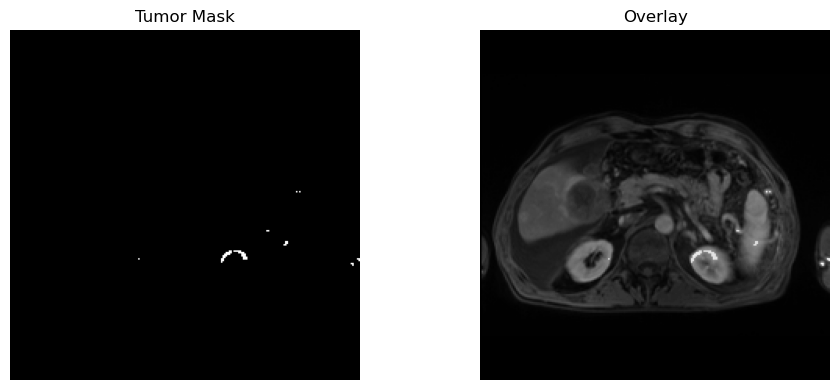

In [15]:
# Create a mask for bright regions (e.g., tumors often appear brighter)
threshold = 180  # You can tune this threshold
mask = np.where(image_resized > threshold, 255, 0).astype(np.uint8)

# Optional: overlay the mask on the original image
overlay = cv2.addWeighted(image_resized, 0.7, mask, 0.3, 0)

# Show the results
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].imshow(mask, cmap='gray')
ax[0].set_title("Tumor Mask")
ax[0].axis("off")

ax[1].imshow(overlay, cmap='gray')
ax[1].set_title("Overlay")
ax[1].axis("off")

plt.tight_layout()
plt.show()